In [1]:
import numpy as np
class City:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.mat = np.zeros((height, width))
        self.objects=[]
        self.obj_colors={
            'empty' : 0,
            'road': 1,
            'car': 2,
            'building': 3,
            'lake': 4,
            'person': 5,
            'tree': 6
        }
    def get_mat(self):
        return self.mat
    def get_pix(self, x, y):
        for k, v in self.obj_colors.items():
            if v == self.mat[x][y]:
                return k
        return "error"
    def set_pix(self, x, y, obj):
        x, y = round(x), round(y)
        if 0 <= x < self.width and 0 <= y < self.height:
            self.mat[x][y] = self.obj_colors[obj]
        x, y = x + 1, y + 1
        if 0 <= x < self.width and 0 <= y < self.height:
            self.mat[x][y] = self.obj_colors[obj]
    def get_obj_pix(self, obj):
        for i in range(self.height):
            for j in range(self.width):
                if self.get_pix(i,j) == obj:
                    print(i ,", ",j)

In [156]:
import matplotlib.pyplot as plt
import random
import math
class Street:
    def __init__(self,city, street_length=100, segment_length=5, street_width=33):
        self.street_length = street_length
        self.segment_length = segment_length
        self.street_width = street_width
        self.points = []
        curve_factor = random.uniform(0, self.street_length / 4)  # גורם עיקול רנדומלי
        angle_offset = random.uniform(0, 2 * math.pi)  # זווית התחלתית רנדומלית
        # יצירת נקודת התחלה קרובה לראשית הצירים
        start_x = random.uniform(0, 20)
        start_y = random.uniform(0, 20)
        # יצירת נקודות הכביש
        self.points = []
        for i in range(int(self.street_length * 5)):  # כל 20 ס"מ
            t = i / (self.street_length * 5)
            angle = t * 2 * math.pi + angle_offset
            x = start_x + t * self.street_length + math.sin(angle) * curve_factor
            y = start_y + math.cos(angle) * curve_factor
            self.points.append((x, y))
            city.set_pix(x,y,'road')
            self.store_road_pixels(city, x, y)
        city.objects.append(self)
    def store_road_pixels(self,city, x, y):
        half_width = self.street_width / 2
        for offset in range(int(-half_width), int(half_width) + 1):
            pixel_x = int(x + offset)
            pixel_y = int(y + offset)
            city.set_pix(pixel_x, pixel_y,'road')
    def is_within_bounds(self, x, y):
        """בודק אם הנקודה נמצאת בתוך הגבולות של הלוח."""
        xlim_min, xlim_max = plt.xlim()
        ylim_min, ylim_max = plt.ylim()
        return xlim_min <= x <= xlim_max and ylim_min <= y <= ylim_max
    def draw_road(self):
        """מצייר את הכביש כקו רציף עם רוחב מוגדר."""
        x_vals = [p[0] for p in self.points]
        y_vals = [p[1] for p in self.points]
        # ציור קו האמצע של הכביש
        plt.plot(x_vals, y_vals, color="black", linewidth=self.street_width)
    def draw_dashed_line(self):
        """יוצר קו מקווקו לאורך הכביש."""
        dashed_length = 10
        gap_length = 10
        for i in range(0, len(self.points) - 1, dashed_length + gap_length):
            if i + dashed_length >= len(self.points):
                break
            for j in range(dashed_length):
                if i + j + 1 >= len(self.points):
                    break
                p1 = self.points[i + j]
                p2 = self.points[i + j + 1]
                plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color="white", linewidth=1)
    def generate_street(self):
        """מייצרת כביש רנדומלי ומציירת אותו ב-Jupyter Notebook."""
#         self.create_street()
        self.draw_road()
        self.draw_dashed_line()
# # דוגמת שימוש ב-Jupyter Notebookיצירת לוח חדש
# street = Street(street_length=100, street_width=30.0)
# # יצירת הכביש
# plt.figure(figsize=(10, 10))
# plt.gca().set_aspect('equal', adjustable='box')
# plt.gca().set_facecolor((0.2, 0.2, 0.2))  # רקע כהה
# # הגדרת גבולות המסך
# plt.xlim(0, 50)
# plt.ylim(0, 50)
# street.generate_street()
# # street.generate_street()
# plt.show()
# # הצגת הנקודות שבהן הכביש תופס פיקסלים
# print("All road pixels:", street.all_points)

In [157]:
import statistics
import numpy as np
import math
class Building:
    dist=28
    data={
        'Big':{
            'Height':[50,10],
            'Width':[30,5],
            'Depth':[25,4]
        },
        'Mean':{
            'Height':[30,8],
            'Width':[20,4],
            'Depth':[15,3]
        },
        'Small':{
            'Height':[15,5],
            'Width':[10,2],
            'Depth':[8,2]
        }
    }
    def __init__(self, street_size='Mean'):
        self.street_size = street_size
        height = max(5, random.gauss(self.data[self.street_size]['Height'][0], self.data[self.street_size]['Height'][1]))
        width = max(5, random.gauss(self.data[self.street_size]['Width'][0], self.data[self.street_size]['Width'][1]))
        depth = max(5, random.gauss(self.data[self.street_size]['Depth'][0], self.data[self.street_size]['Depth'][1]))
        self.size = [height, width, depth]
        self.center_location = (0, 0)  # Will be set later
        self.rotation = 0  # Will be set later

# def check_collision(new_building, existing_buildings):
#     # Check collision with existing buildings
#     for existing in existing_buildings:
#         dx = abs(new_building.center_location[0] - existing.center_location[0])
#         dy = abs(new_building.center_location[1] - existing.center_location[1])
#         min_distance = max(new_building.size[1], new_building.size[2]) / 2 + \
#                        max(existing.size[1], existing.size[2]) / 2 + Building.dist
#         if dx < min_distance and dy < min_distance:
#             return True
#     return False

def check_collision(new_building, existing_buildings, city):
    # Check collision with existing buildings
    for existing in existing_buildings:
        dx = abs(new_building.center_location[0] - existing.center_location[0])
        dy = abs(new_building.center_location[1] - existing.center_location[1])
        min_distance = max(new_building.size[1], new_building.size[2]) / 2 + \
                       max(existing.size[1], existing.size[2]) / 2 + Building.dist
        if dx < min_distance and dy < min_distance:
            return True
    
    # Check if building is placed on a road in the city's matrix
    center_x, center_y = round(new_building.center_location[0]), round(new_building.center_location[1])
    building_width = round(new_building.size[1])
    building_depth = round(new_building.size[2])
    
    for dx in range(-building_width // 2, building_width // 2 + 1):
        for dy in range(-building_depth // 2, building_depth // 2 + 1):
            x, y = center_x + dx, center_y + dy
            if 0 <= x < city.width and 0 <= y < city.height:
                if city.get_pix(x, y) == 'road':  # בדיקה אם הפיקסל הוא כביש
                    return True

    return False

def place_buildings_on_streets(city):
    streets = []
    for obj in city.objects:
#         print(type(obj))
        if type(obj) == Street:
            streets.append(obj)
    for street in streets:
        points = street.points
        side_walk = 3 #street.side_walk
        buildings = []
        max_attempts = 100
        for i, point in enumerate(points):
            if i % 10 != 0:  # Try to place a building every 2 meters
                continue
            for side in [-1, 1]:  # Left and right side of the street
                new_building = Building()
                for _ in range(max_attempts):
                    # Calculate building position and rotation
                    if i < len(points) - 1:
                        dx = points[i+1][0] - point[0]
                        dy = points[i+1][1] - point[1]
                        angle = math.atan2(dy, dx)
                    else:
                        dx = points[i-1][0] - point[0]
                        dy = points[i-1][1] - point[1]
                        angle = math.atan2(dy, dx)
                    offset = side * (street.street_width / 2 + side_walk + new_building.size[2] / 2)
                    new_building.center_location = (
                        point[0] - math.sin(angle) * offset,
                        point[1] + math.cos(angle) * offset
                    )
                    new_building.rotation = angle + (math.pi / 2 if side > 0 else -math.pi / 2)
                    if not check_collision(new_building, buildings,city):
                        buildings.append(new_building)
#                         create_building(new_building)
                        break
#                 if _ == max_attempts - 1:
#                     print(f"Failed to place building at point {i} on side {side}")
        print("##########",buildings)
        city.objects.extend(buildings)
# Clear existing objects

In [158]:
# def place_buildings_on_streets(city):
#     streets = []
#     for obj in city.objects:
# #         print(type(obj))
#         if type(obj) == Street:
#             streets.append(obj)
#     for street in streets:
#         points = street.points
#         side_walk = 3 #street.side_walk
#         buildings = []
#         max_attempts = 100
#         for i, point in enumerate(points):
#             if i % 10 != 0:  # Try to place a building every 2 meters
#                 continue
#             for side in [-1, 1]:  # Left and right side of the street
#                 new_building = Building()
#                 for _ in range(max_attempts):
#                     # Calculate building position and rotation
#                     if i < len(points) - 1:
#                         dx = points[i+1][0] - point[0]
#                         dy = points[i+1][1] - point[1]
#                         angle = math.atan2(dy, dx)
#                     else:
#                         dx = points[i-1][0] - point[0]
#                         dy = points[i-1][1] - point[1]
#                         angle = math.atan2(dy, dx)
                        

In [159]:
import math
import numpy as np
import matplotlib.pyplot as plt
# Assuming Building and Street classes exist
def plot_city(city):
    streets = []
    buildings = []
    for obj in city.objects:
        if isinstance(obj, Street):
            streets.append(obj)
        elif isinstance(obj, Building):
            buildings.append(obj)
    fig, ax = plt.subplots()
    # Plot streets
    for street in streets:
        points = street.points
        x_vals = [p[0] for p in points]
        y_vals = [p[1] for p in points]
        ax.plot(x_vals, y_vals, color='black', linewidth=street.street_width)
    # Plot buildings
    for building in buildings:
        center_x, center_y = building.center_location
        width, height = building.size[0], building.size[1]
        angle = building.rotation
        # Get the corners of the rectangle (building) after rotation
        rect = plt.Rectangle((center_x - width / 2, center_y - height / 2), width, height, angle=np.degrees(angle), color='blue', alpha=0.5)
        ax.add_patch(rect)
    ax.set_aspect('equal')
    plt.show()
# Example usage:
# Assuming you have already created the city object with streets and buildings.



In [160]:
def main():
    my_city = City(50, 50)
    street = Street(my_city)
    street.generate_street()
    place_buildings_on_streets(my_city)
    plot_city(my_city)
    print(my_city.objects)
    l = my_city.get_obj_pix('road')
    print(len(l))

########## [<__main__.Building object at 0x0000017ABEE580D0>, <__main__.Building object at 0x0000017ABFB9FF10>, <__main__.Building object at 0x0000017AC0878090>, <__main__.Building object at 0x0000017ABF7BEDD0>, <__main__.Building object at 0x0000017ABF185F50>]


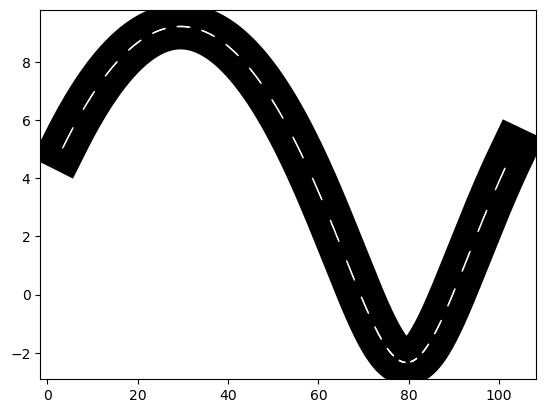

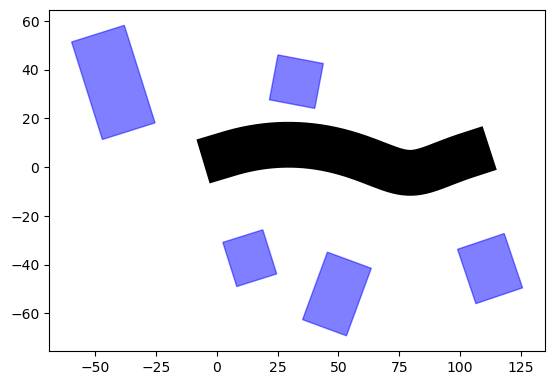

[<__main__.Street object at 0x0000017ABEE2B190>, <__main__.Building object at 0x0000017ABEE580D0>, <__main__.Building object at 0x0000017ABFB9FF10>, <__main__.Building object at 0x0000017AC0878090>, <__main__.Building object at 0x0000017ABF7BEDD0>, <__main__.Building object at 0x0000017ABF185F50>]


AttributeError: 'City' object has no attribute 'get_obj_pix'

In [161]:
main()

In [ ]:
def find_road_edges(city):
    left_edge = []
    right_edge = []
    
    # Loop through the city matrix
    for i in range(1, city.height - 1):  # Avoid edges of the matrix
        for j in range(1, city.width - 1):
            # If this pixel is a road
            if city.mat[i][j] == city.obj_colors['road']:
                
                # Check if the pixel to the left is not a road
                if city.mat[i][j - 1] != city.obj_colors['road']:
                    left_edge.append((i, j - 1))
                
                # Check if the pixel to the right is not a road
                if city.mat[i][j + 1] != city.obj_colors['road']:
                    right_edge.append((i, j + 1))
                
                # Check if the pixel above is not a road (could be part of left edge)
                if city.mat[i - 1][j] != city.obj_colors['road']:
                    left_edge.append((i - 1, j))
                
                # Check if the pixel below is not a road (could be part of right edge)
                if city.mat[i + 1][j] != city.obj_colors['road']:
                    right_edge.append((i + 1, j))

    return left_edge, right_edge


In [162]:
city = City(50, 50)
street = Street(city, street_length=30)
left_edge, right_edge = find_road_edges(city)
street.generate_street()
print("Left edge pixels:", left_edge)
print("Right edge pixels:", right_edge)


ValueError: not enough values to unpack (expected 2, got 1)

In [163]:
import matplotlib.pyplot as plt
import numpy as np

def display_city(city, left_edge=None, right_edge=None):
    # Define the color map for different objects
    cmap = {
        'empty': (1, 1, 1),  # white
        'road': (0, 0, 0),  # black
        'car': (1, 0, 0),  # red
        'building': (0, 0, 1),  # blue
        'lake': (0, 1, 1),  # cyan
        'person': (1, 0, 1),  # magenta
        'tree': (0, 1, 0),  # green
    }

    # Create an RGB image for displaying the matrix
    image = np.zeros((city.height, city.width, 3))

    # Fill the image matrix based on the city matrix and color map
    for i in range(city.height):
        for j in range(city.width):
            for obj_name, obj_color in cmap.items():
                if city.get_pix(i, j) == obj_name:
                    image[i, j] = obj_color

    # If left and right edges are provided, color them differently
    if left_edge is not None:
        for (x, y) in left_edge:
            if 0 <= x < city.height and 0 <= y < city.width:
                image[x, y] = (1, 1, 0)  # yellow for left edge

    if right_edge is not None:
        for (x, y) in right_edge:
            if 0 <= x < city.height and 0 <= y < city.width:
                image[x, y] = (1, 0.5, 0)  # orange for right edge

    # Display the image
    plt.imshow(image)
    plt.title("City View")
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage
city = City(200, 200)
street = Street(city, street_length=100)

# Find the road edges
left_edge, right_edge = find_road_edges(city)

# Display the city with road edges
display_city(city, left_edge, right_edge)


ValueError: not enough values to unpack (expected 2, got 1)

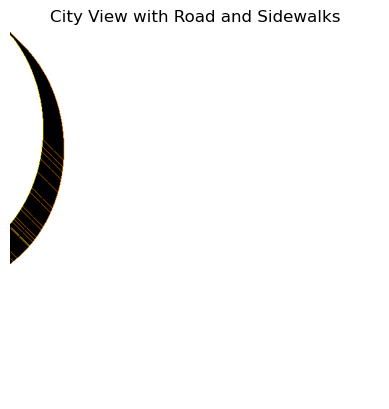

In [164]:
import numpy as np
import matplotlib.pyplot as plt

class City:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.mat = np.zeros((height, width))
        self.objects = []
        self.obj_colors = {
            'empty': 0,
            'road': 1,
            'car': 2,
            'building': 3,
            'lake': 4,
            'person': 5,
            'tree': 6
        }

    def get_mat(self):
        return self.mat

    def get_pix(self, x, y):
        return self.mat[x][y] if 0 <= x < self.height and 0 <= y < self.width else "error"

    def set_pix(self, x, y, obj):
        x, y = round(x), round(y)
        if 0 <= x < self.width and 0 <= y < self.height:
            self.mat[x][y] = self.obj_colors[obj]

def find_road_edges(city):
    grid = city.get_mat()
    rows, cols = grid.shape
    visited = np.zeros_like(grid, dtype=bool)
    
    def dfs(x, y, road):
        if x < 0 or x >= rows or y < 0 or y >= cols or visited[x][y] or grid[x][y] != 1:
            return
        visited[x][y] = True
        road.append((x, y))

        # Recursive DFS for all directions (up, down, left, right)
        dfs(x + 1, y, road)  # Down
        dfs(x - 1, y, road)  # Up
        dfs(x, y + 1, road)  # Right
        dfs(x, y - 1, road)  # Left

    roads = []
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 1 and not visited[i][j]:
                road = []
                dfs(i, j, road)

                if road:
                    # Collect sidewalk edges for left and right
                    left_sidewalk = []
                    right_sidewalk = []

                    for (x, y) in road:
                        # Check right side (y + 1)
                        if y + 1 < cols and grid[x][y + 1] == 0:
                            right_sidewalk.append((x, y + 1))
                        # Check left side (y - 1)
                        if y - 1 >= 0 and grid[x][y - 1] == 0:
                            left_sidewalk.append((x, y - 1))

                    roads.append((road, left_sidewalk, right_sidewalk))
    
    return roads

def display_city(city, left_edge=None, right_edge=None):
    # Define the color map for different objects
    cmap = {
        0: (1, 1, 1),  # empty - white
        1: (0, 0, 0),  # road - black
        2: (1, 0, 0),  # car - red
        3: (0, 0, 1),  # building - blue
        4: (0, 1, 1),  # lake - cyan
        5: (1, 0, 1),  # person - magenta
        6: (0, 1, 0),  # tree - green
    }

    # Create an RGB image for displaying the matrix
    image = np.zeros((city.height, city.width, 3))

    # Fill the image matrix based on the city matrix and color map
    for i in range(city.height):
        for j in range(city.width):
            image[i, j] = cmap[city.get_pix(i, j)]

    # If left and right edges are provided, color them differently
    if left_edge:
        for (x, y) in left_edge:
            if 0 <= x < city.height and 0 <= y < city.width:
                image[x, y] = (1, 1, 0)  # yellow for left edge

    if right_edge:
        for (x, y) in right_edge:
            if 0 <= x < city.height and 0 <= y < city.width:
                image[x, y] = (1, 0.5, 0)  # orange for right edge

    # Display the image
    plt.imshow(image)
    plt.title("City View with Road and Sidewalks")
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage
city = City(600, 600)
street = Street(city, street_length=400)
# street1 = Street(city, street_length=100)
# street2 = Street(city, street_length=100)
# street3 = Street(city, street_length=100)



# Find the road edges using DFS
roads = find_road_edges(city)

# Display the city with road edges highlighted
if roads:
    road, left_sidewalk, right_sidewalk = roads[0]
    display_city(city, left_sidewalk, right_sidewalk)


In [165]:
import math

def find_next_point(points, current_point, target_distance, tolerance=3):
    # פונקציה שמחשבת את המרחק האוקלידי בין שתי נקודות
    def euclidean_distance(p1, p2):
        return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

    # למצוא את האינדקס של הנקודה הנוכחית ברשימת הנקודות
    if current_point not in points:
        raise ValueError("הנקודה הנוכחית לא נמצאת ברשימה")

    current_index = points.index(current_point)

    # לבדוק כל נקודה אחרי הנקודה הנוכחית
    for next_index in range(current_index + 1, len(points)):
        next_point = points[next_index]
        distance = euclidean_distance(current_point, next_point)

        # אם המרחק שווה למרחק המבוקש עם חריגה של עד 1
        if abs(distance - target_distance) <= tolerance:
            return next_point

    # אם לא נמצאה נקודה מתאימה, נזרוק שגיאה
    raise ValueError("לא נמצאה נקודה במרחק המתאים")

# דוגמת שימוש
points = [(1, 2), (3, 4), (6, 8), (10, 12), (14, 15)]
current_point = (1, 2)
target_distance = 5

try:
    next_point = find_next_point(points, current_point, target_distance)
    print(f"הנקודה הבאה היא: {next_point}")
except ValueError as e:
    print(e)


הנקודה הבאה היא: (3, 4)


In [166]:
roads = find_road_edges(city)
right = roads[0][2]
right
next_point = find_next_point(right, right[2], 22)
next_point

(217, 86)

In [167]:
import numpy as np
import matplotlib.pyplot as plt
# SCREEN_WIDTH = 1900
# SCREEN_HEIGHT = 1200

def draw_point(city, x, y, width, color=1):
    half_width = width // 2
    x_range = np.arange(max(0, x - half_width), min(city.width, x + half_width))
    y_range = np.arange(max(0, y - half_width), min(city.hieght, y + half_width))
    for i in x_range:
        for j in y_range:
            city.set_pix(x, y, color)
    return city

def draw_line(city, p1, p2, width, color=3):
    x1, y1 = p1
    x2, y2 = p2
    # Check if vertical line to avoid division by zero
    if x1 == x2:
        y_vals = np.linspace(y1, y2, 500).astype(int)
        x_vals = np.full_like(y_vals, x1)
    else:
        # Calculate slope and intercept
        a = (y2 - y1) / (x2 - x1)
        b = y1 - a * x1
        x_vals = np.linspace(x1, x2, 500).astype(int)
        y_vals = (a * x_vals + b).astype(int)
    # Draw points for the line
    for x, y in zip(x_vals, y_vals):
        city = draw_point(city, x, y, width, color)
    return city



def draw_rectangle(city, center, direction, height, width, color=2, line_width=2):
    # Normalize the direction vector
    direction = direction / np.linalg.norm(direction)
    perpendicular = np.array([-direction[1], direction[0]])
    half_height_vec = direction * (height / 2)
    half_width_vec = perpendicular * (width / 2)
    # Calculate corners of the rectangle
    p1 = center + half_height_vec + half_width_vec
    p2 = center + half_height_vec - half_width_vec
    p3 = center - half_height_vec - half_width_vec
    p4 = center - half_height_vec + half_width_vec
    # Draw rectangle borders
    city = draw_line(city, p1, p2, line_width, 4)
    city = draw_line(city, p2, p3, line_width, 4)
    city = draw_line(city, p3, p4, line_width, 4)
    city = draw_line(city, p4, p1, line_width, 4)
    # Fill the rectangle
    for x1, x2 in zip(np.linspace(p1[0], p2[0], 500), np.linspace(p4[0], p3[0], 500)):
        y1 = np.interp(x1, [p1[0], p2[0]], [p1[1], p2[1]])
        y2 = np.interp(x2, [p4[0], p3[0]], [p4[1], p3[1]])
        screen = draw_line(city, [x1, y1], [x2, y2], line_width, color)
    return city





# # Create an empty screen
# screen = np.zeros((SCREEN_HEIGHT, SCREEN_WIDTH), dtype=int)
# # Parameters for the rectangle
# center = np.array([900, 600])  # center point (x, y)
# direction = np.array([1, 4])   # direction vector (x, y)
# height = 200                   # height of the rectangle
# width = 100                    # width of the rectangle
# # Draw the rectangle
# screen = draw_rectangle(screen, center, direction, height, width, line_width=5, color=2)
# # Display the screen using matplotlib
# def display_screen(screen):
#     plt.imshow(screen, cmap='gray')
#     plt.show()
# # display_screen(screen)

In [168]:
def place_buildings_on_streets(city, buildings_num):
    roads = find_road_edges(city)
    # Display the city with road edges highlighted
    for road in roads:
        mid, left_sidewalk, right_sidewalk = road
        side_walk = 3 #street.side_walk
        buildings = []
        max_attempts = 100
        for side, points in zip([-1, 1],[left_sidewalk, right_sidewalk]):
            print(side, points)
            for i in range(0, len(points)-1, len(points) // (buildings_num // (len(roads) * 2))):
                new_building = Building()
                start_point = points[i]
                building_width = new_building.size[1]
                end_point=0
                print("start", start_point, i)
                try:
                    end_point = find_next_point(points, start_point, target_distance)
                    print("next", end_point, points.index(end_point))
                except ValueError as e:
                    print(e)
                    continue
                center_point = [(start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2]
                dx = end_point[0] - start_point[0]
                dy = end_point[1] - start_point[1]
                angle = math.atan2(dy, dx)
                new_building.rotation = angle + (math.pi / 2 if side > 0 else -math.pi / 2)
                offset = side * (street.street_width / 2 + side_walk + new_building.size[2] / 2)
                new_building.center_location = (
                    center_point[0] - math.sin(angle) * offset,
                    center_point[1] + math.cos(angle) * offset
                )
                draw_rectangle(city, new_building.center_location, new_building.rotation , new_building.size[0], new_building.size[1],'building')
                
            
                
                
            

In [169]:
place_buildings_on_streets(city, 8)

-1 [(10, 0), (11, 1), (12, 2), (13, 3), (14, 4), (15, 5), (16, 6), (17, 6), (18, 7), (19, 8), (20, 9), (21, 9), (22, 10), (23, 11), (24, 11), (25, 12), (26, 13), (27, 13), (28, 14), (29, 15), (30, 15), (31, 16), (32, 17), (33, 17), (34, 18), (35, 18), (36, 19), (37, 20), (38, 20), (39, 21), (40, 21), (41, 22), (42, 22), (43, 23), (44, 24), (45, 24), (46, 25), (47, 25), (48, 26), (49, 26), (50, 27), (51, 27), (52, 28), (53, 28), (54, 29), (55, 29), (56, 30), (57, 30), (58, 31), (59, 31), (60, 32), (61, 32), (62, 32), (63, 33), (64, 33), (65, 34), (66, 34), (67, 35), (68, 35), (69, 35), (70, 36), (71, 36), (72, 36), (73, 37), (74, 37), (75, 38), (76, 38), (77, 38), (78, 39), (79, 39), (80, 39), (81, 40), (82, 40), (83, 40), (84, 41), (85, 41), (86, 41), (87, 42), (88, 42), (89, 42), (90, 43), (91, 43), (92, 43), (93, 44), (94, 44), (95, 44), (96, 44), (97, 45), (98, 45), (99, 45), (100, 45), (101, 46), (102, 46), (103, 46), (104, 46), (105, 47), (106, 47), (107, 47), (108, 47), (109, 47)

ZeroDivisionError: integer division or modulo by zero